In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.express as px

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"E:/Data Science/1/MY2022 Fuel Consumption Ratings.csv")

In [4]:
df.sample(5)

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
6,2022,Acura,TLX Type S,Compact,3.0,6,AS10,Z,12.3,9.4,11.0,26,256,5,5
139,2022,Buick,Encore GX,SUV: Small,1.2,3,AV,X,8.0,7.6,7.8,36,184,6,7
512,2022,Jeep,Grand Cherokee L 4X4,SUV: Standard,3.6,6,A8,X,13.0,9.4,11.3,25,266,4,7
579,2022,Land Rover,Range Rover Sport HST P400,SUV: Standard,3.0,6,AS8,Z,12.7,9.9,11.4,25,269,4,7
937,2022,Volvo,V60 T6 AWD,Station wagon: Small,2.0,4,AS8,Z,11.3,7.5,9.6,29,224,5,7


In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

Model Year                           0
Make                                 0
Model                                0
Vehicle Class                        0
Engine Size(L)                       0
Cylinders                            0
Transmission                         0
Fuel Type                            0
Fuel Consumption (City (L/100 km)    0
Fuel Consumption(Hwy (L/100 km))     0
Fuel Consumption(Comb (L/100 km))    0
Fuel Consumption(Comb (mpg))         0
CO2 Emissions(g/km)                  0
CO2 Rating                           0
Smog Rating                          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         946 non-null    int64  
 1   Make                               946 non-null    object 
 2   Model                              946 non-null    object 
 3   Vehicle Class                      946 non-null    object 
 4   Engine Size(L)                     946 non-null    float64
 5   Cylinders                          946 non-null    int64  
 6   Transmission                       946 non-null    object 
 7   Fuel Type                          946 non-null    object 
 8   Fuel Consumption (City (L/100 km)  946 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 11  Fuel Consumption(Comb (mpg))       946 non-null    int64  

In [8]:
df.columns

Index(['Model Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size(L)',
       'Cylinders', 'Transmission', 'Fuel Type',
       'Fuel Consumption (City (L/100 km)', 'Fuel Consumption(Hwy (L/100 km))',
       'Fuel Consumption(Comb (L/100 km))', 'Fuel Consumption(Comb (mpg))',
       'CO2 Emissions(g/km)', 'CO2 Rating', 'Smog Rating'],
      dtype='object')

In [9]:
df.rename(columns={'Model Year':'Model_Year', 'Vehicle Class':'Vechile_Class', 'Engine Size(L)':'Engine_Size','Fuel Type':'Fuel_Type',
                   'CO2 Emissions(g/km)':'CO2','CO2 Rating':'CO2_Rating', 'Smog Rating':'Smog_Rating'},inplace=True)

In [10]:
df.columns

Index(['Model_Year', 'Make', 'Model', 'Vechile_Class', 'Engine_Size',
       'Cylinders', 'Transmission', 'Fuel_Type',
       'Fuel Consumption (City (L/100 km)', 'Fuel Consumption(Hwy (L/100 km))',
       'Fuel Consumption(Comb (L/100 km))', 'Fuel Consumption(Comb (mpg))',
       'CO2', 'CO2_Rating', 'Smog_Rating'],
      dtype='object')

In [11]:
df.drop(columns=['Fuel Consumption (City (L/100 km)','Fuel Consumption(Hwy (L/100 km))','Fuel Consumption(Comb (mpg))'],inplace=True)

In [12]:
df.rename(columns={'Fuel Consumption(Comb (L/100 km))':"Consumption"},inplace=True)

In [13]:
df.head(2)

,Model_Year,Make,Model,Vechile_Class,Engine_Size,Cylinders,Transmission,Fuel_Type,Consumption,CO2,CO2_Rating,Smog_Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,8.6,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,11.2,263,4,5


In [14]:
df.columns

Index(['Model_Year', 'Make', 'Model', 'Vechile_Class', 'Engine_Size',
       'Cylinders', 'Transmission', 'Fuel_Type', 'Consumption', 'CO2',
       'CO2_Rating', 'Smog_Rating'],
      dtype='object')

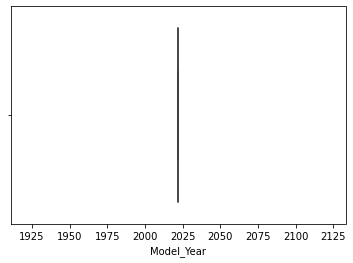

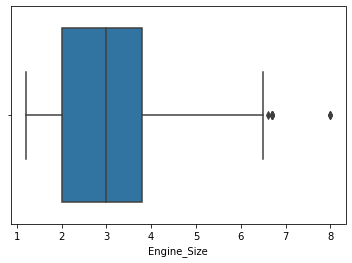

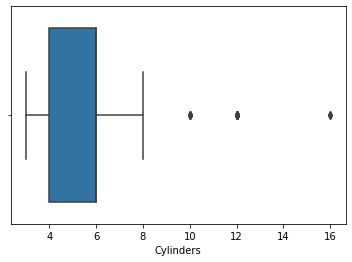

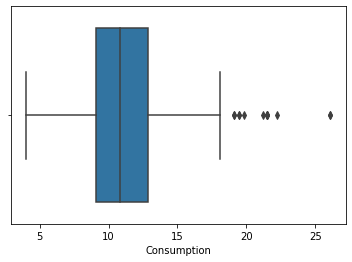

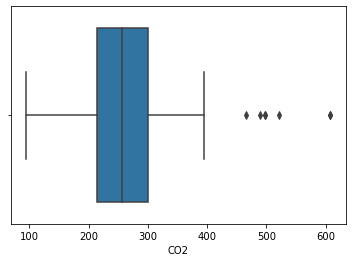

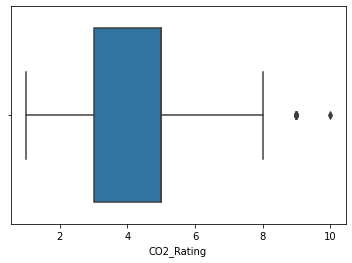

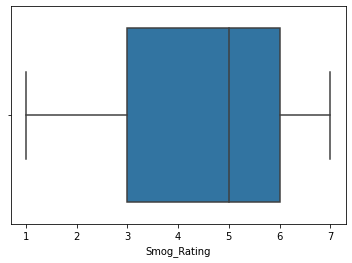

In [15]:
l = []
for i in df.columns:
    try:
        sns.boxplot(df[i])
        plt.show()
    except:
        l.append(i)
        pass

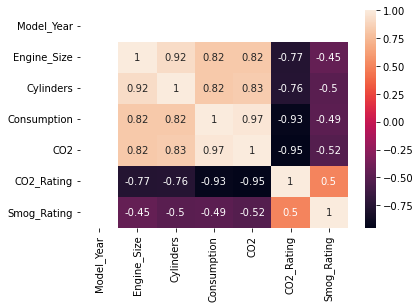

In [16]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [17]:
df.drop(columns=["Model_Year","Smog_Rating"],inplace=True)

In [18]:
df.dtypes

Make              object
Model             object
Vechile_Class     object
Engine_Size      float64
Cylinders          int64
Transmission      object
Fuel_Type         object
Consumption      float64
CO2                int64
CO2_Rating         int64
dtype: object

In [19]:
for i in l:
    x = df[i].nunique()
    print("No.of Unique Values in {} --- {}".format(i,x))

No.of Unique Values in Make --- 39
No.of Unique Values in Model --- 715
No.of Unique Values in Vechile_Class --- 14
No.of Unique Values in Transmission --- 23
No.of Unique Values in Fuel_Type --- 4


In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le = LabelEncoder()

In [22]:
for i in l:
    df[i]=le.fit_transform(df[[i]])

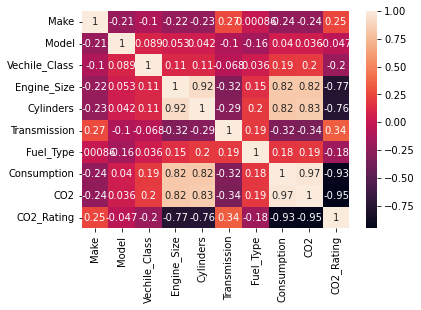

In [23]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [24]:
df.columns

Index(['Make', 'Model', 'Vechile_Class', 'Engine_Size', 'Cylinders',
       'Transmission', 'Fuel_Type', 'Consumption', 'CO2', 'CO2_Rating'],
      dtype='object')

In [25]:
x = df.drop('Consumption',axis=1)

In [26]:
y = df["Consumption"]

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=1)

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
model = RandomForestRegressor()

In [31]:
model.fit(x_train,y_train)


RandomForestRegressor()

In [32]:
model.score(x_train,y_train)

0.9955644309217007

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
model = RandomForestRegressor()

In [35]:
param_grid={
        "n_estimators":[100,500],
        "max_features":['auto','sqrt','log2'],
        "max_depth":[4,5,6,7,8],
         "criterion":['squared_error']   
}

In [36]:
c_ran = GridSearchCV(estimator=model,
    param_grid=param_grid,cv=5)

In [37]:
c_ran.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 500]})

In [38]:
c_ran.best_params_

{'criterion': 'squared_error',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 100}

In [39]:
model1 = RandomForestRegressor(n_estimators=500,max_features='log2',max_depth=8,criterion='squared_error')

In [40]:
model1.fit(x_train,y_train)

RandomForestRegressor(max_depth=8, max_features='log2', n_estimators=500)

In [41]:
pred =model1.predict(x_test)

In [42]:
pred

array([14.76132153, 16.98780596, 14.1314305 , 12.18576336, 10.69188987,
       10.18735489,  9.95236344, 14.76048756,  9.46484524, 11.98658677,
        9.47769688, 13.38980308,  8.4974179 , 13.76146938,  7.3476961 ,
        9.97420536, 13.7640496 ,  7.97916001,  7.61551673,  9.590673  ,
       14.12107839, 10.15526446,  7.08764028, 12.38615232,  7.89475902,
       12.23062911,  8.52582609,  9.59163456,  9.46433191,  7.09431524,
        9.79856854, 10.46058474, 14.02408091,  7.22569702, 14.48730221,
       14.04468929, 10.32610145,  8.60603157, 14.76447739,  9.41525952,
        9.28380965,  9.58004608, 18.25698725, 13.17599584, 13.69966685,
       11.3737024 ,  8.30410167,  7.35902671, 11.65078371, 10.29640005,
       10.29990782, 14.73988028,  8.24596273, 10.4145806 ,  9.53204964,
        9.3862957 , 11.68496619, 16.68802221, 10.38340844, 11.30629306,
       10.89746272,  9.58080236, 10.90321554, 11.27193001,  9.33628093,
        7.12282427,  7.59262024,  9.59102513,  5.90563896,  4.45

In [43]:
model1.score(x_train,y_train)

0.9947168492186447

In [44]:
model1.score(x_test,y_test)

0.9916616065595807

In [45]:
from sklearn.metrics import mean_squared_error

In [46]:
mean_squared_error(pred,y_test)

0.06850134429451277

In [47]:
import math

In [48]:
math.sqrt(mean_squared_error(pred,y_test))

0.26172761469610495